
# Projeto - Teen Smartphone Usage and Addiction Impact

Este projeto utiliza o dataset "Teen Smartphone Usage and Addiction Impact", que reúne dados comportamentais de adolescentes com o objetivo de entender o impacto do uso de smartphones em diferentes aspectos da vida, como:

* Nível de adição digital  
* Desempenho acadêmico  
* Hábitos de uso do celular (tempo em redes sociais, jogos, estudos)  
* Saúde física e mental (atividade física, sintomas de dependência)  

## O Impacto do Uso Excessivo de Smartphones

Estudos recentes mostram que o uso descontrolado de smartphones entre adolescentes pode estar associado a:

* Redução no desempenho escolar  
* Aumento da ansiedade e depressão  
* Sedentarismo e distúrbios do sono  
* Dificuldades de atenção e foco  

Compreender esses padrões comportamentais é fundamental para criar estratégias de intervenção social, educacional e psicológica.

## Por que usar K-Means?

O algoritmo de aprendizado de máquina não supervisionado K-Means será utilizado para descobrir perfis ocultos de usuários com base em suas características comportamentais e cognitivas.

Objetivo principal:

1. Identificar tipos de adolescentes (clusters) com padrões similares de uso do smartphone e analisar como esses perfis se relacionam com saúde, produtividade e vícios digitais.  
2. Esse tipo de abordagem é ideal quando:  
3. Os rótulos das classes não são conhecidos previamente  
4. O objetivo é encontrar grupos naturais em dados complexos  

## Dataset

O dataset contém 3000 observações e 25 colunas, incluindo variáveis quantitativas, categóricas e proxies de saúde e produtividade.

----



# Project - Teen Smartphone Usage and Addiction Impact

This project utilizes the "Teen Smartphone Usage and Addiction Impact" dataset, which collects behavioral data from teenagers to understand the impact of smartphone use on various aspects of their lives, such as:

* Digital addiction level  
* Academic performance  
* Cell phone usage habits (time on social media, gaming, studying)  
* Physical and mental health (physical activity, addiction symptoms)  

## The Impact of Excessive Smartphone Usage

Recent studies show that uncontrolled smartphone use among teenagers can be associated with:

* Reduced school performance  
* Increased anxiety and depression  
* Sedentary lifestyle and sleep disturbances  
* Difficulties with attention and focus  

Understanding these behavioral patterns is fundamental for creating social, educational, and psychological intervention strategies.

## Why Use K-Means?

The unsupervised machine learning algorithm K-Means will be used to discover hidden user profiles based on their behavioral and cognitive characteristics.

Main objective:

1. Identify types of teenagers (clusters) with similar smartphone usage patterns and analyze how these profiles relate to health, productivity, and digital addictions.  
2. This type of approach is ideal when:  
3. Class labels are not known beforehand  
4. The goal is to find natural groups within complex data  

## Dataset

The dataset contains 3000 observations and 25 columns, including quantitative, categorical, and proxy variables for health and productivity.


## Library imports and configuration


In [88]:
# Data Manipulation
import pandas as pd # For loading, exploring, and transforming data.
import numpy as np # For numerical operations.
import os # For interacting with the operating system, if needed (though not strictly necessary for this subtask).

# Visualization
import matplotlib.pyplot as plt # For creating static plots.
import seaborn as sns # For enhanced statistical data visualization.
import plotly.express as px # For interactive plots (optional, useful for PCA visualization later).

# Preprocessing
from sklearn.preprocessing import StandardScaler # For standardizing features by removing the mean and scaling to unit variance.
from sklearn.decomposition import PCA # For Principal Component Analysis, used for dimensionality reduction.

# Clustering
from sklearn.cluster import KMeans # For applying the K-Means clustering algorithm.

# Evaluation
from sklearn.metrics import silhouette_score # For evaluating the quality of clusters.

# Utilities
import warnings # For managing warnings.
warnings.filterwarnings('ignore') # To suppress unnecessary visual warnings and keep the notebook clean.

# 🎨 Plotting Style Configuration (Seaborn + Matplotlib)
sns.set_style("whitegrid") # Sets the background style (options: "darkgrid", "white", "ticks").
sns.set_context("notebook") # Sets the font scale and style (options: notebook, paper, talk, poster).
sns.set_palette("viridis") # Sets a color palette for the plots (a perceptually uniform colormap).
plt.rcParams['figure.figsize'] = (10, 6) # Sets the default size for matplotlib figures.

## Data loading and initial exploration (eda)

In [76]:
# Load the dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Display the first few rows of the DataFrame
print("DataFrame Head:")
display(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for the numerical columns
print("\nDataFrame Describe:")
display(df.describe())

# Check for any missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Print the column names
print("\nColumn Names:")
print(df.columns)

DataFrame Head:


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control       

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000



Missing Values:


,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0



Column Names:
Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')



## Visualizar distribuições de variáveis numéricas com histogramas e curvas KDE

Neste passo, identificamos todas as colunas numéricas do DataFrame utilizando `select_dtypes` com os tipos `int64` e `float64`.  
Em seguida, iteramos por cada uma dessas colunas para gerar gráficos que combinam histogramas com curvas de densidade (KDE), o que permite observar a distribuição dos dados e a suavidade da frequência.  
Essas visualizações são úteis para detectar padrões como simetria, caudas longas, multimodalidade e outros comportamentos relevantes nas variáveis numéricas.

----

## Visualizing Distributions of Numerical Variables Using Histograms and KDE Plots

In this step, we identify all numerical columns in the DataFrame using `select_dtypes` with `int64` and `float64` types.  
Then, we iterate over each of these columns to generate plots that combine histograms with KDE (Kernel Density Estimate) curves.  
This allows us to observe the shape and spread of the data distributions, making it easier to detect patterns such as skewness, long tails, and multimodal behavior in numerical variables.


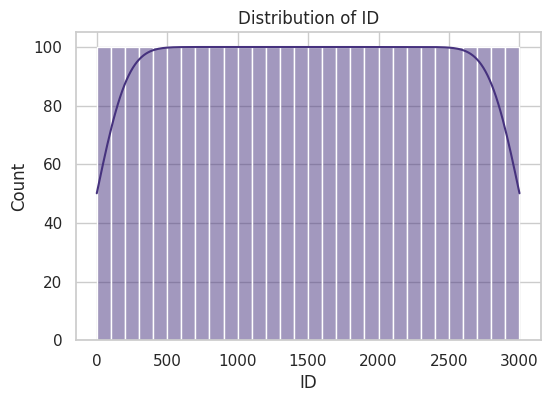

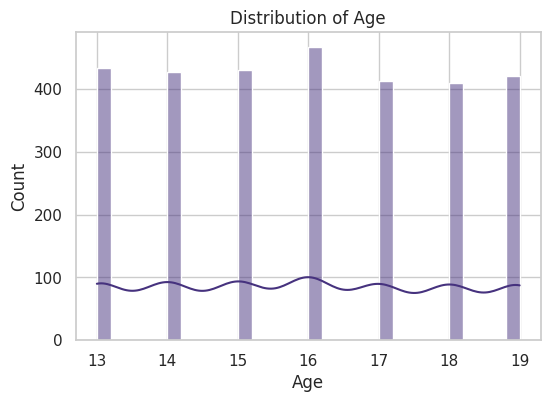

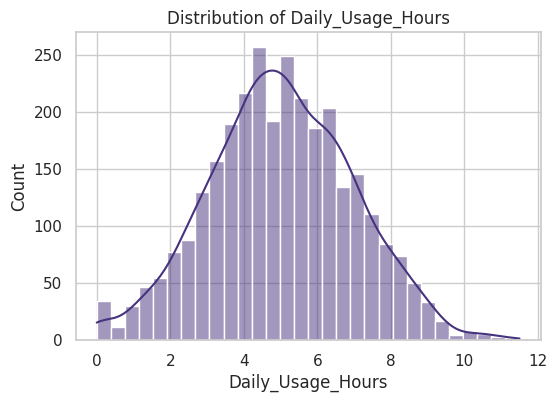

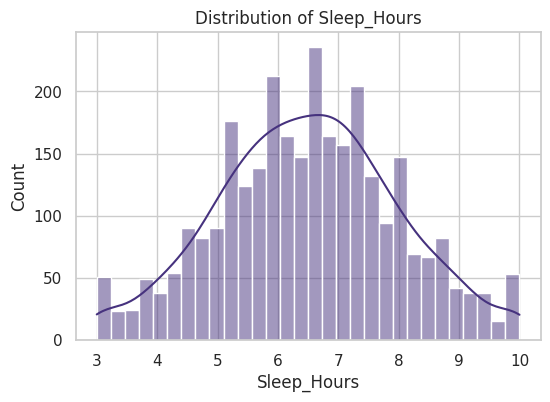

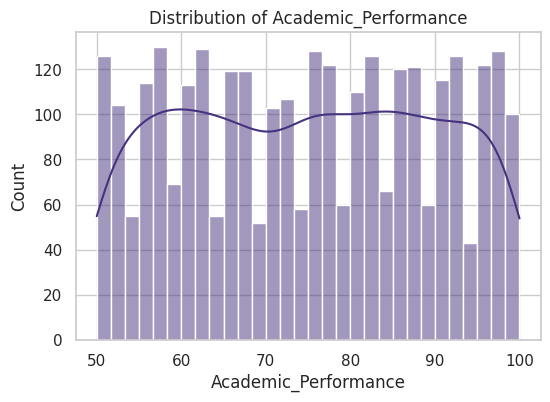

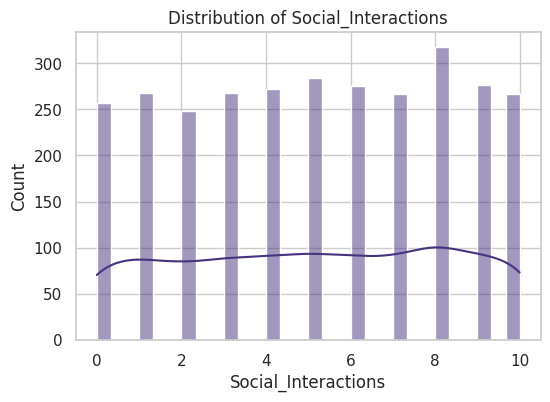

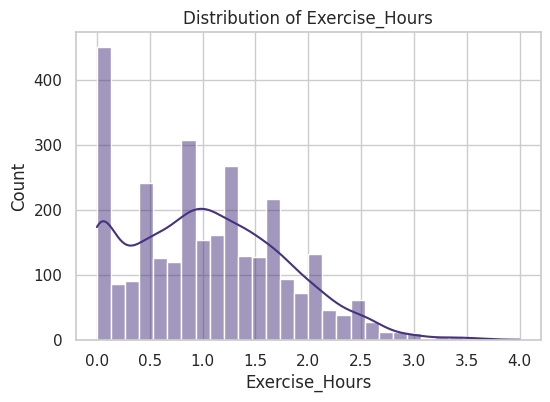

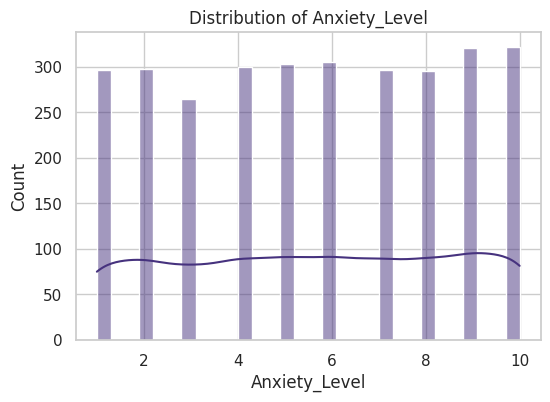

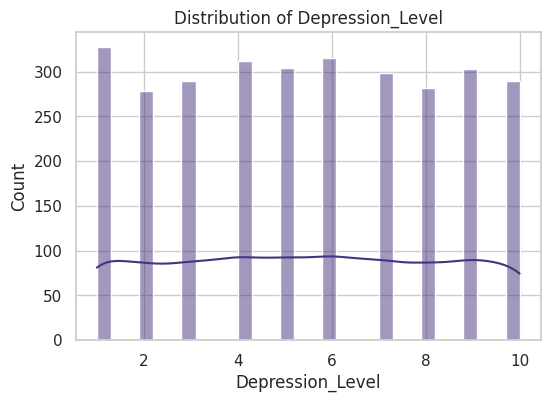

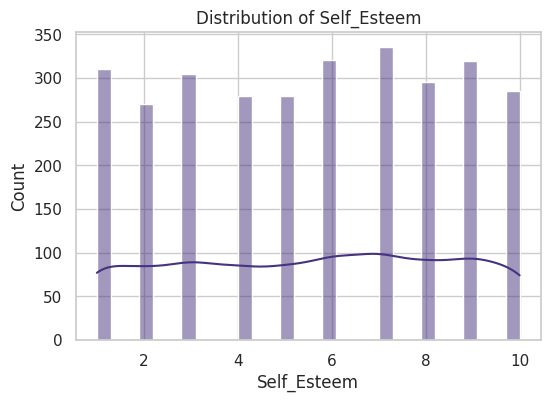

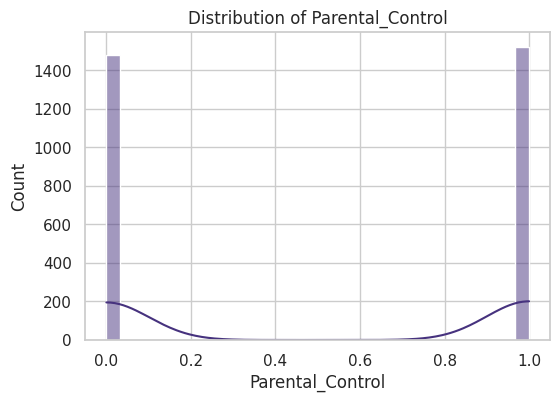

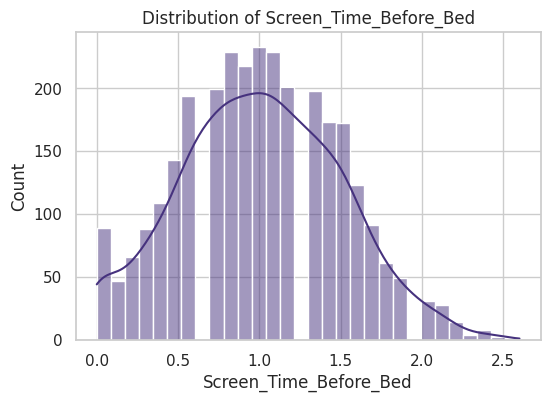

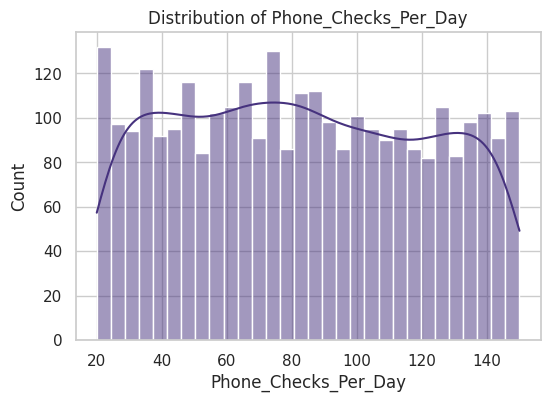

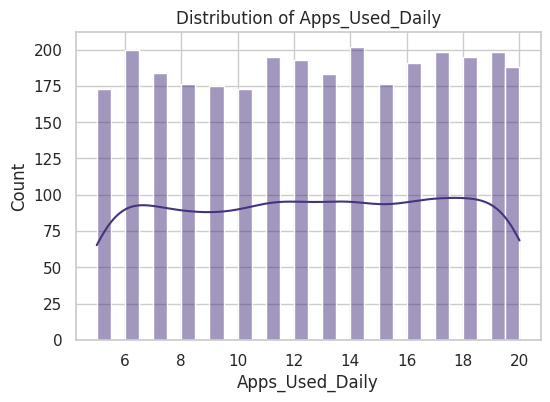

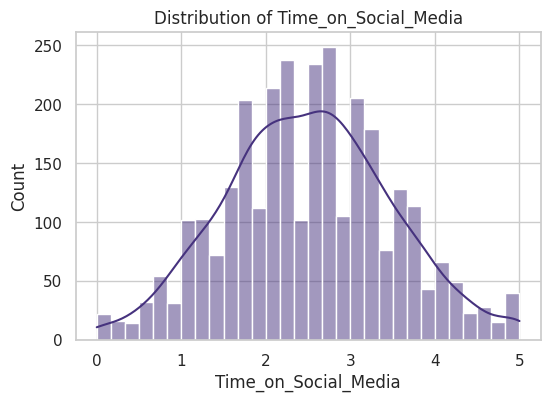

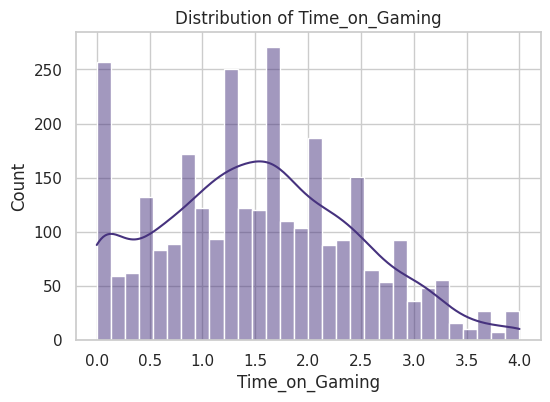

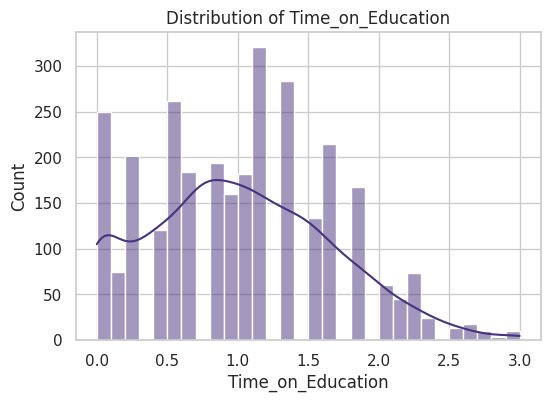

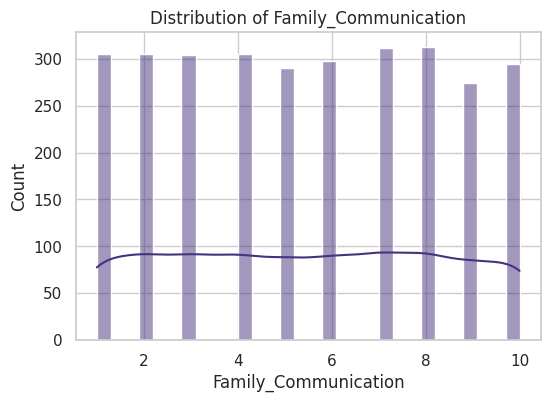

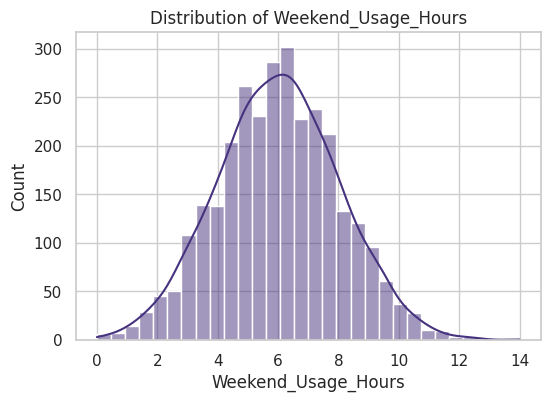

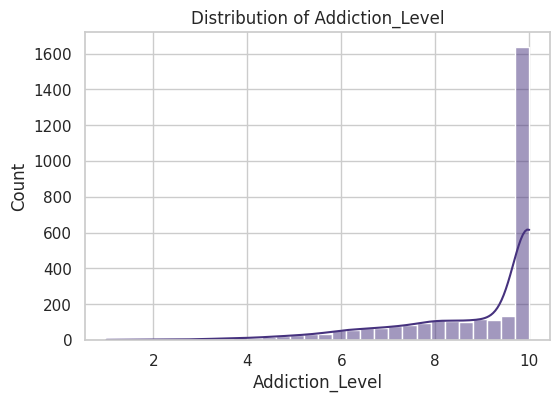

In [77]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through numerical columns and plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4)) # Set figure size for each plot
    # Create a histogram with KDE plot for the current numerical column
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}') # Add a title to the plot
    plt.show() # Display the plot

## Visualizing Categorical Distributions with Count Plots

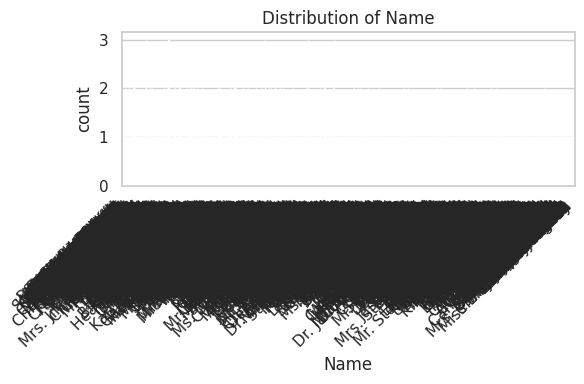

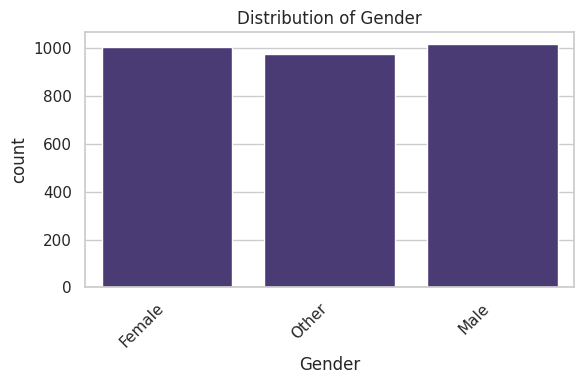

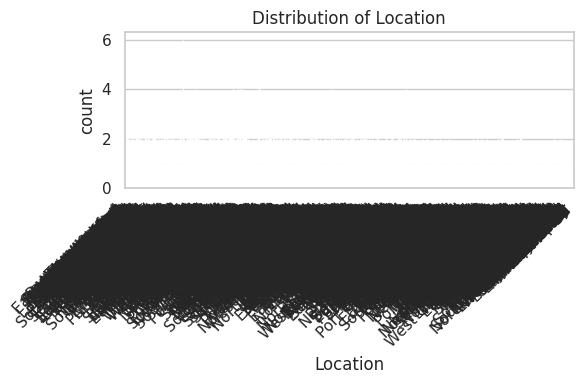

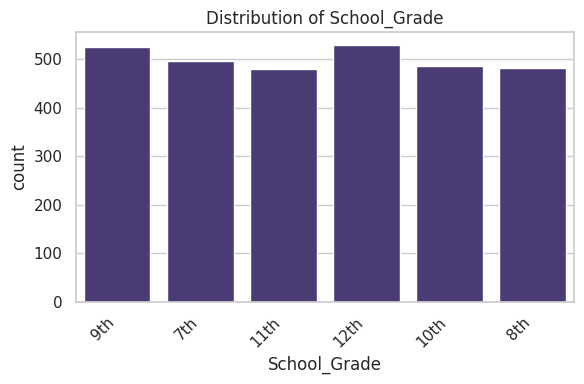

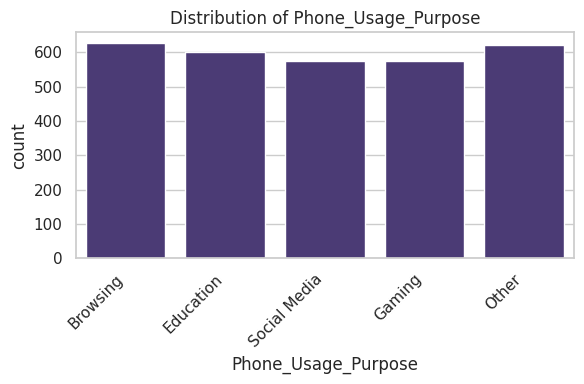

In [78]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Iterate through categorical columns and plot count plots
for col in categorical_cols:
    plt.figure(figsize=(6, 4)) # Set figure size for each plot
    # Create a count plot for the current categorical column
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}') # Add a title to the plot
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show() # Display the plot

## Análise de correlação e detecção de outliers com heatmap e boxplots

Neste passo, realizamos uma análise de correlação entre as variáveis numéricas e buscamos identificar possíveis outliers.  

Primeiro, selecionamos apenas as colunas numéricas do DataFrame utilizando `select_dtypes`.  
Em seguida, construímos um **heatmap** com a matriz de correlação dessas variáveis, usando a função `sns.heatmap`.  
Esse mapa de calor permite visualizar facilmente quais variáveis têm correlações fortes (positivas ou negativas), ajudando na compreensão de possíveis relações lineares entre elas.

Depois, iteramos por cada variável numérica e geramos **boxplots**.  
Esses gráficos são usados para identificar valores discrepantes (outliers), além de oferecer uma visão clara da dispersão, mediana e assimetria dos dados.  
Essa etapa é essencial para a preparação e limpeza dos dados antes de aplicar algoritmos de machine learning.

----

## Correlation Analysis and Outlier Detection with Heatmap and Boxplots

In this step, we perform a correlation analysis among numerical variables and look for potential outliers.

We begin by selecting only the numerical columns from the DataFrame using `select_dtypes`.  
Then, we create a **heatmap** to visualize the correlation matrix of these variables using `sns.heatmap`.  
This allows us to easily spot strong positive or negative correlations, providing insights into potential linear relationships between the variables.

Next, we iterate through each numerical variable and generate **boxplots**.  
These plots are used to detect outliers and provide a clear view of data dispersion, median, and skewness.  
This step is crucial for data understanding and preprocessing before applying any machine learning algorithm.


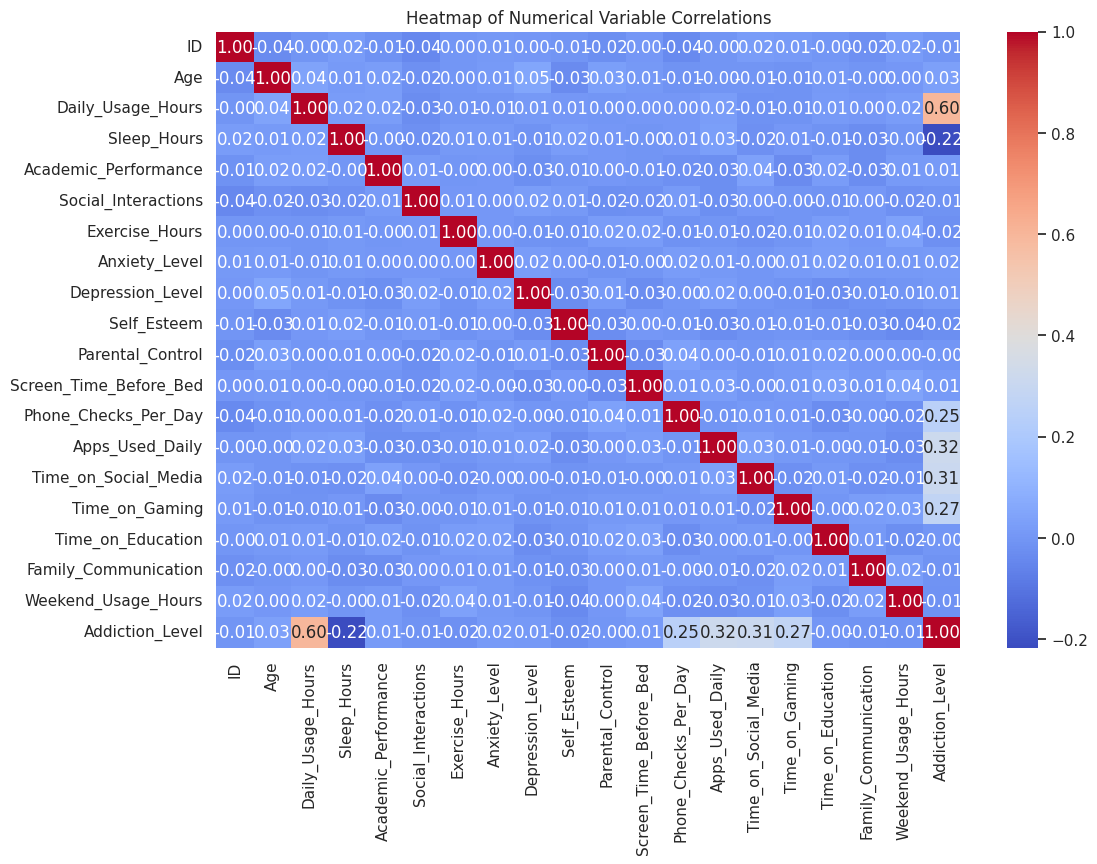

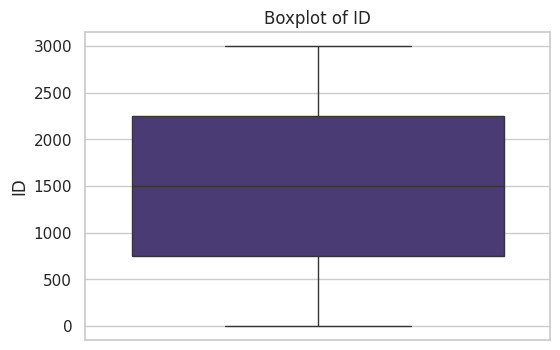

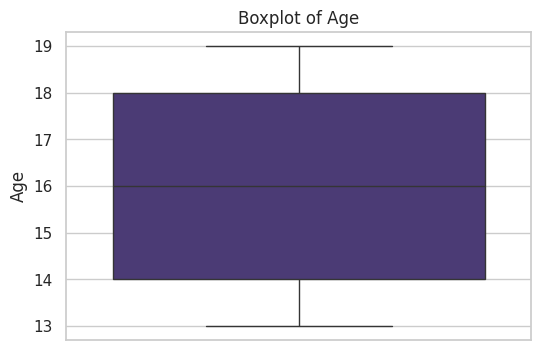

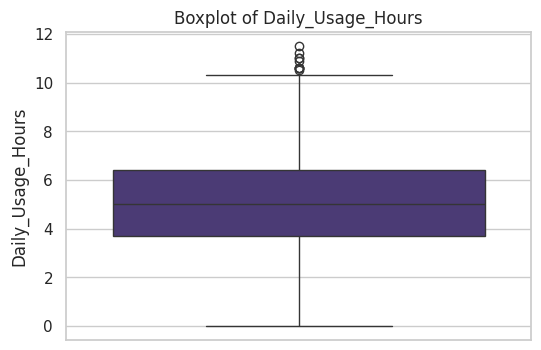

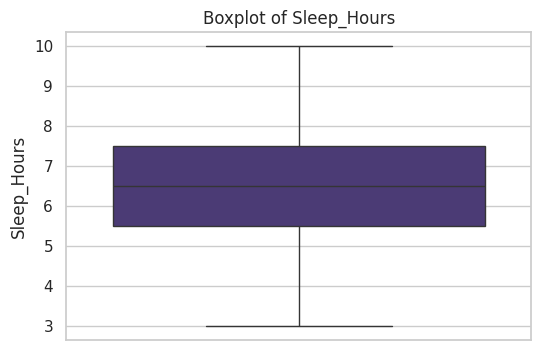

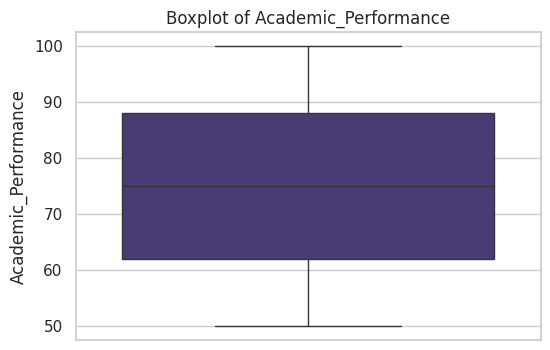

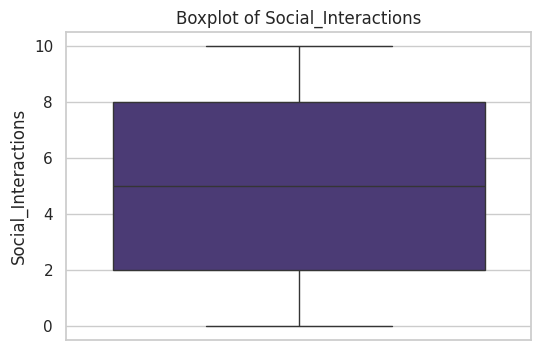

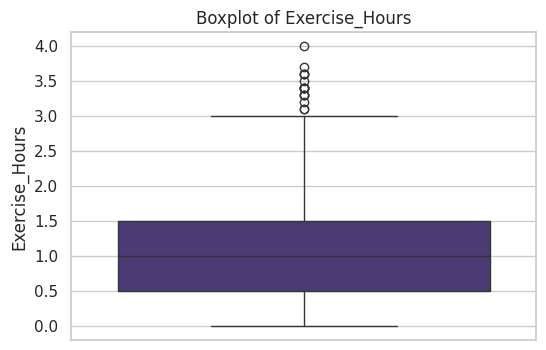

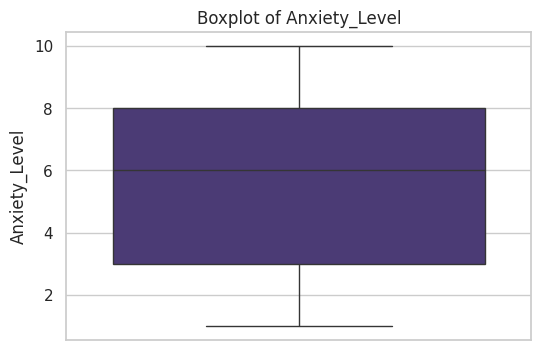

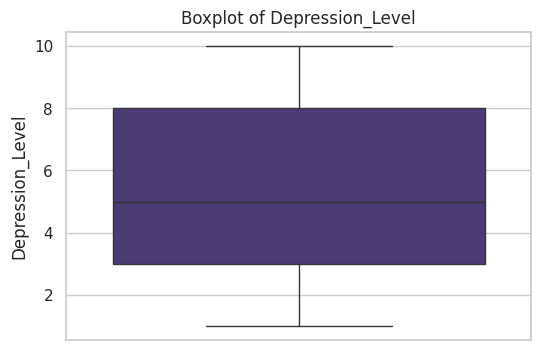

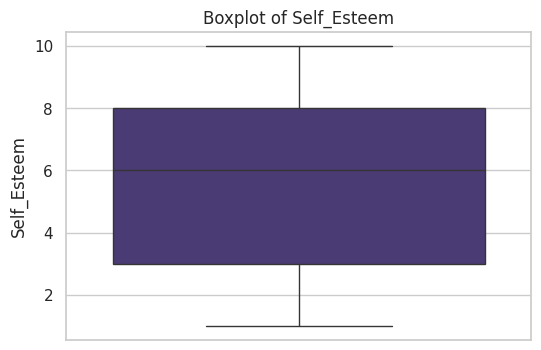

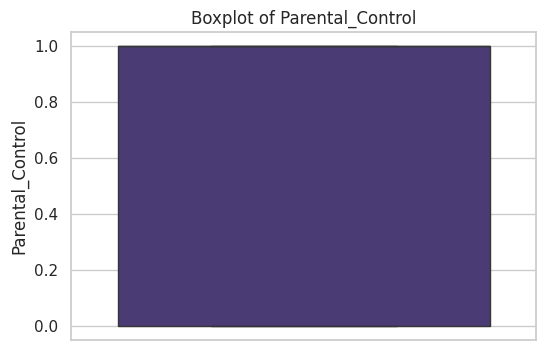

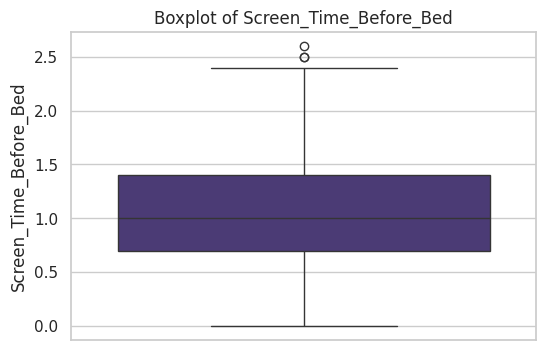

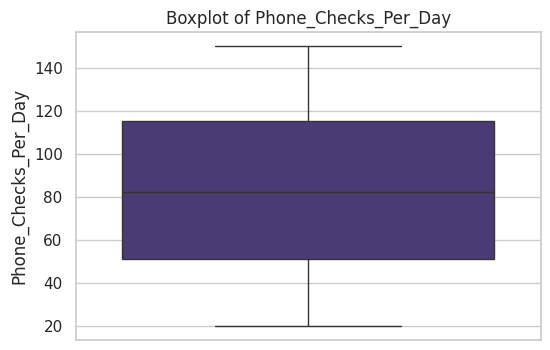

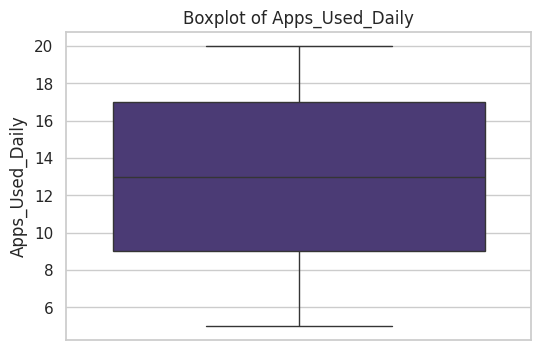

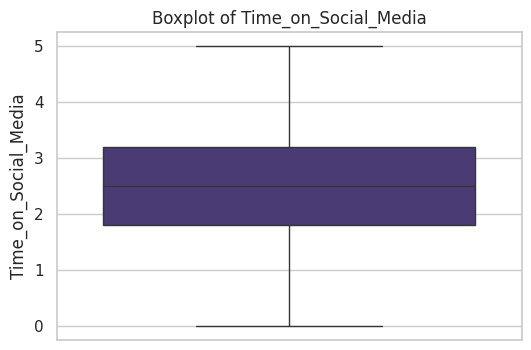

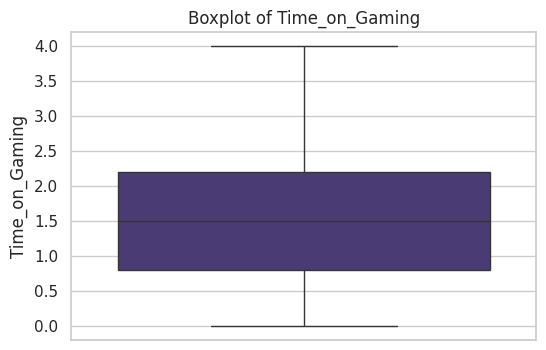

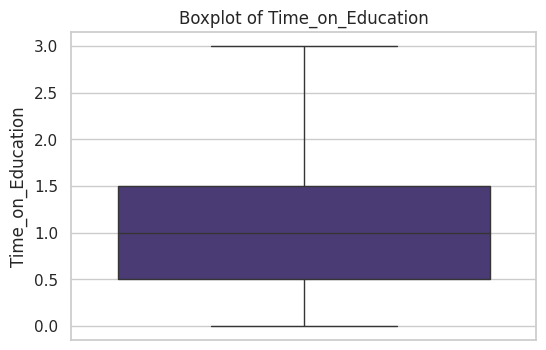

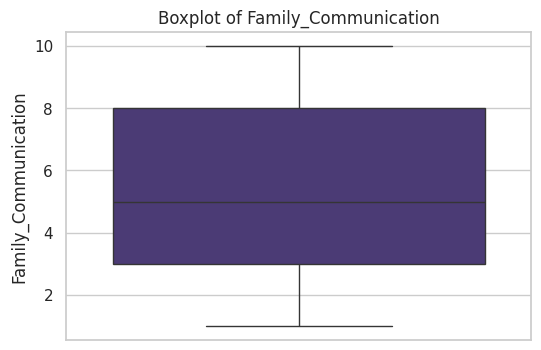

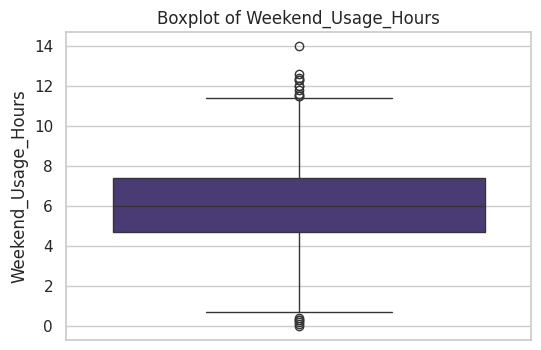

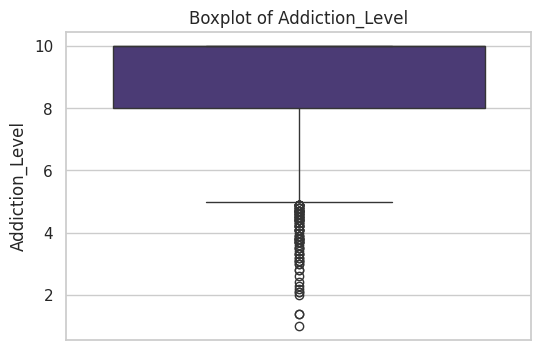

In [79]:
# Select only the numerical columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8)) # Set the figure size for better readability
# Generate the heatmap using seaborn's heatmap function
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Variable Correlations") # Set the title of the heatmap
plt.show() # Display the heatmap

# Iterate through each numerical column and create a boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4)) # Set figure size for each boxplot
    # Create a boxplot for the current numerical column
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}') # Set the title for the boxplot
    plt.show() # Display the boxplot

## Seleção de Variáveis para K-Means e Padronização das Features Numéricas

Com base na Análise Exploratória de Dados (EDA), especialmente no heatmap de correlação, observamos que várias variáveis numéricas apresentam correlação significativa com o nível de adição digital ('Addiction_Level').  
Como o objetivo do K-Means é agrupar indivíduos com padrões comportamentais semelhantes relacionados ao uso de smartphones, selecionamos variáveis que melhor representam esses padrões e suas possíveis relações com dependência e outros desfechos.

As variáveis selecionadas foram:

* **Daily_Usage_Hours:** Mede diretamente o tempo total gasto no celular por dia, um indicador claro da intensidade de uso.  
* **Apps_Used_Daily:** Representa a diversidade de atividades realizadas no celular.  
* **Time_on_Social_Media:** Quantifica o engajamento com redes sociais, uma das áreas mais comuns de uso excessivo.  
* **Time_on_Gaming:** Mede o tempo dedicado a jogos no celular, outro fator relevante de uso.  
* **Phone_Checks_Per_Day:** Indica o número de vezes que o usuário checa o celular por dia, funcionando como um proxy de comportamento compulsivo.  
* **Time_on_Education:** Reflete um uso potencialmente produtivo do celular, que pode ajudar a distinguir perfis mais equilibrados.

Essas variáveis são quantitativas, atendendo ao requisito do algoritmo K-Means tradicional. Elas capturam diferentes dimensões da interação com o smartphone, o que deve ajudar a identificar segmentos distintos de usuários.

### Padronização das Variáveis Numéricas

O K-Means é sensível à escala dos dados. Variáveis com magnitudes maiores podem influenciar desproporcionalmente o cálculo das distâncias e, consequentemente, a formação dos clusters.  
Por isso, aplicamos a **padronização**, que consiste em transformar os dados para que tenham média 0 e desvio padrão 1, garantindo que todas as variáveis contribuam igualmente para o modelo.

----

## Selecting Variables for K-Means and Standardizing Numerical Features

Based on the Exploratory Data Analysis (EDA), especially the correlation heatmap, we observed that several numerical variables show strong correlations with 'Addiction_Level'.  
Since K-Means clustering aims to group individuals based on similar behavioral patterns related to smartphone usage, we selected the variables most relevant to understanding these patterns and their relationship to addiction and other outcomes.

The selected variables are:

* **Daily_Usage_Hours:** Direct measure of the total daily screen time, a key indicator of usage intensity.  
* **Apps_Used_Daily:** Captures the diversity of phone activities.  
* **Time_on_Social_Media:** Quantifies engagement with social media platforms, often a dominant usage type.  
* **Time_on_Gaming:** Tracks time spent on mobile games, another important usage category.  
* **Phone_Checks_Per_Day:** Acts as a proxy for compulsive checking behavior, indicating phone dependence.  
* **Time_on_Education:** Represents potentially productive usage, which may differentiate user profiles.

These are all quantitative features, which is a requirement for the standard K-Means algorithm. They reflect different aspects of smartphone interaction and are expected to aid in uncovering meaningful user segments.

### Standardizing Numerical Features

K-Means is sensitive to feature scale. Variables with larger numerical ranges may dominate the clustering process.  
To ensure fair contribution of all features, we apply **standardization**, which transforms the data to have a mean of 0 and a standard deviation of 1. This ensures balanced distance calculations during clustering.


In [81]:
# Define the list of numerical columns selected for clustering
selected_numerical_cols = [
    'Daily_Usage_Hours',
    'Apps_Used_Daily',
    'Time_on_Social_Media',
    'Time_on_Gaming',
    'Phone_Checks_Per_Day',
    'Time_on_Education'
]

# Select these columns from the original DataFrame
df_clustering = df[selected_numerical_cols]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected data and transform it
X_scaled = scaler.fit_transform(df_clustering)

# Display the first few rows of the standardized data to verify
print("First 5 rows of the standardized data:")
display(pd.DataFrame(X_scaled, columns=selected_numerical_cols).head())

First 5 rows of the standardized data:


,Daily_Usage_Hours,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Phone_Checks_Per_Day,Time_on_Education
0,-0.521767,1.386046,1.114095,0.187372,0.077025,0.283334
1,0.245036,-0.782814,-1.416176,2.653739,0.341991,1.208927
2,0.398397,-0.999700,-2.225862,-0.027094,1.428350,-0.950789
3,-0.981848,-1.216586,0.608041,0.080139,1.189881,-0.333728
4,-1.288569,1.602932,0.101987,-0.670494,0.341991,0.129069


# K-Means: Aplicação e Avaliação

Para agrupar os dados padronizados, utilizamos o algoritmo de K-Means. Para encontrar o número ideal de clusters, aplicamos dois métodos complementares:

* Elbow Method: avalia como a inércia (soma das distâncias dentro dos clusters) diminui à medida que o número de clusters aumenta. O ponto de inflexão ("cotovelo") indica uma boa escolha para o número de grupos.

* Silhouette Score: mede a qualidade do agrupamento com base em quão similares os dados estão dentro do mesmo cluster em comparação com outros clusters. Um valor mais alto indica melhor separação.

Após determinar o número ideal de clusters, aplicamos o K-Means com esse valor e usamos PCA (Análise de Componentes Principais) para reduzir os dados a duas dimensões e facilitar a visualização dos grupos formados.

---

# K-Means: Application and Evaluation

To group the standardized data, we applied the K-Means algorithm. To find the optimal number of clusters, we used two complementary methods:

* Elbow Method: evaluates how the inertia (sum of squared distances within clusters) decreases as the number of clusters increases. The "elbow" point suggests the ideal number of groups.

* Silhouette Score: measures clustering quality based on how similar the data points are within the same cluster compared to others. A higher score indicates better separation.

After determining the optimal number of clusters, we applied K-Means using that value and used PCA (Principal Component Analysis) to reduce the data to two dimensions, making it easier to visualize the formed groups.

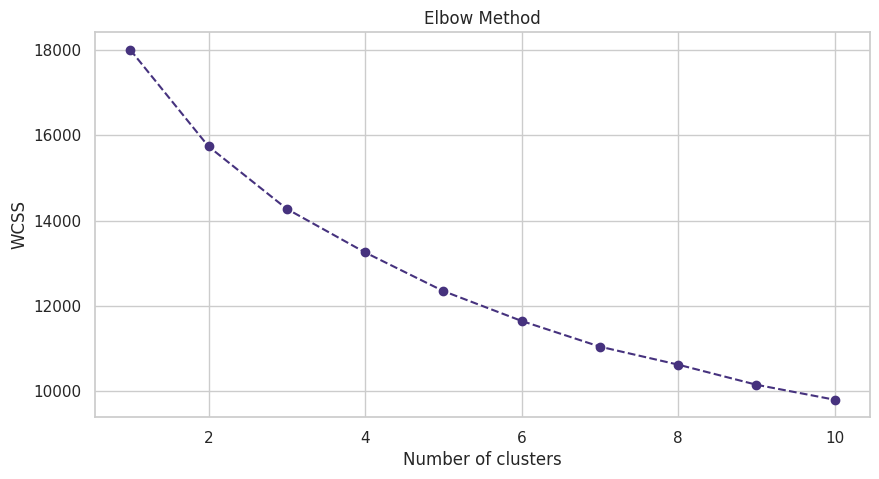

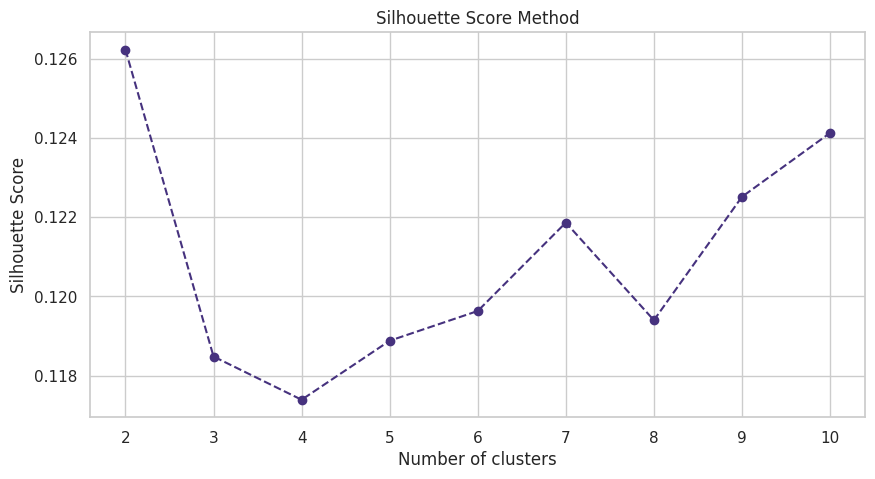

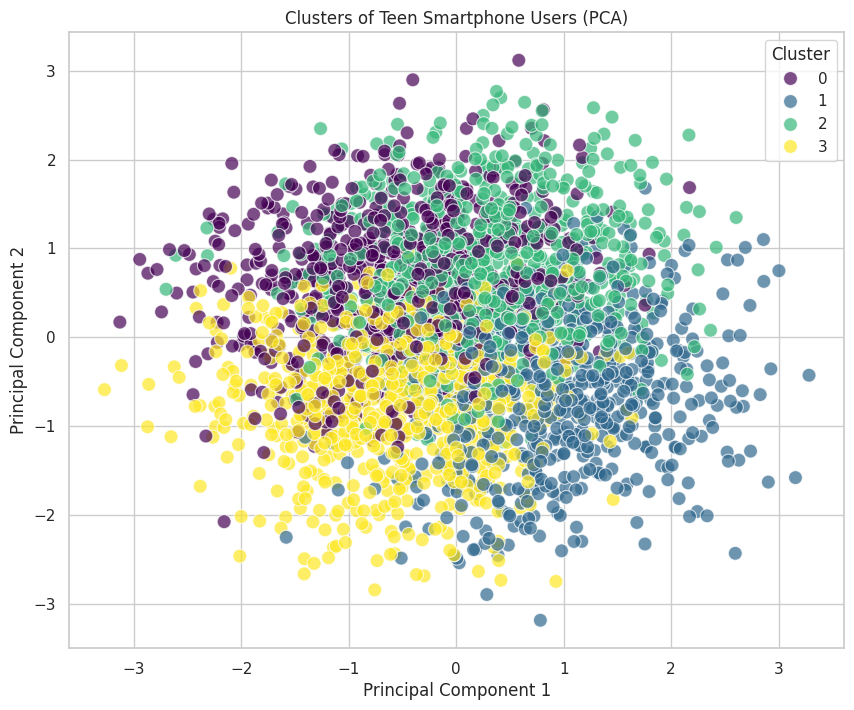

In [89]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Final Clustering and Visualization with the optimal number of clusters (let's choose 4 based on the graphs)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_viz = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_viz, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Teen Smartphone Users (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Análise e Interpretação dos Clusters

Após aplicar o algoritmo K-Means e obter os rótulos de cluster para cada observação, agora é hora de entender o perfil de cada grupo formado. Para isso, começamos adicionando a coluna de rótulo do cluster ao nosso DataFrame de dados padronizados. Em seguida, calculamos a média das variáveis usadas na clusterização dentro de cada cluster. Isso nos permite identificar padrões e características predominantes em cada grupo.

Com base nesses perfis médios, podemos atribuir nomes significativos aos clusters, por exemplo, “Usuários Leves” ou “Usuários Intensivos” dependendo do comportamento médio observado.

Também é essencial visualizar graficamente esses perfis, facilitando a comparação entre os grupos. Utilizamos gráficos de barras para mostrar a média das variáveis em cada cluster.

Além disso, exploramos como as variáveis categóricas (como gênero, região, tipo de uso etc.) se distribuem entre os clusters. Essa análise ajuda a identificar se certos perfis demográficos ou comportamentais são mais comuns em determinados grupos.

Essa interpretação é crucial para transformar resultados numéricos em insights práticos e aplicáveis, permitindo decisões orientadas por dados.

---

# Cluster Analysis and Interpretation
After applying the K-Means algorithm and obtaining the cluster labels for each observation, it’s time to understand the profile of each formed group. To begin, we add the cluster label column to our standardized data DataFrame. Then, we calculate the mean of the clustering variables within each cluster. This allows us to identify patterns and dominant characteristics in each group.

Based on these average profiles, we can assign meaningful names to the clusters for instance, "Light Users" or "Heavy Users" — depending on the observed behavior.

It’s also important to visually represent these profiles, making it easier to compare the clusters. We use bar charts to show the average value of each variable in each cluster.

Furthermore, we explore how categorical variables (such as gender, region, type of use, etc.) are distributed across the clusters. This analysis helps identify whether certain demographic or behavioral profiles are more common in specific groups.

This interpretation step is essential for turning numerical results into practical, actionable insights, supporting data-driven decision-making.

In [83]:
# Add the cluster labels to the df_clustering DataFrame
df_clustering['Cluster'] = clusters

# Calculate the mean of each feature for each cluster
cluster_profile = df_clustering.groupby('Cluster').mean()

# Display the calculated cluster profiles
print("Cluster Profiles (Mean values):")
display(cluster_profile)

Cluster Profiles (Mean values):


,Daily_Usage_Hours,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Phone_Checks_Per_Day,Time_on_Education
Cluster,,,,,,
0,4.759585,9.988342,2.731088,1.327979,122.762953,0.982124
1,5.167239,14.943838,2.476911,1.384555,71.134165,1.818097
2,5.171250,17.066250,2.626000,1.766250,82.442500,0.593750
3,5.004320,8.748412,2.161118,1.588437,54.580686,0.826429


## Análise e nomeação dos clusters com base nos perfis médios
Após aplicar o K-means e calcular o perfil médio de cada cluster, agora é o momento de dar nomes significativos a eles. Isso é feito com base nas médias das variáveis de uso observadas em cada grupo.

Cada cluster representa um padrão de comportamento distinto entre os usuários, identificado pelas variáveis como: quantidade de aplicativos usados, tempo em redes sociais, tempo dedicado a jogos, educação, entre outros. Ao observar essas características, podemos inferir o estilo de uso e nomear os grupos de maneira mais interpretável.

Esses nomes são atribuídos diretamente no DataFrame `cluster_profile` para facilitar a análise posterior.

---

## Cluster analysis and naming based on average profiles
After applying K-means and calculating the average profile for each cluster, it's time to assign meaningful names to them. This is done based on the average values of usage variables observed in each group.

Each cluster represents a distinct behavior pattern among users, identified by variables such as number of apps used, time spent on social media, gaming, education, and others. By examining these characteristics, we can infer usage styles and give the groups more interpretable names.

These names are directly added to the `cluster_profile` DataFrame to facilitate further analysis.

In [84]:
# Assign meaningful names to the clusters based on the mean profiles
# Cluster 0: High Phone Checks, Moderate Usage, Average Social Media, Lower Gaming/Education - "Compulsive Checkers"
# Cluster 1: Moderate Usage, High Education Time, Average Apps/Social/Gaming/Checks - "Balanced & Educational Users"
# Cluster 2: High Apps/Gaming, Moderate Usage, Moderate Social Media, Average Checks, Low Education - "Heavy App/Gaming Users"
# Cluster 3: Lower Usage, Low Apps/Social/Checks, Moderate Gaming, Lower Education - "Low Engagement / Casual Users"


# Define a dictionary to map cluster numbers to meaningful names
cluster_names = {
    0: 'Compulsive Checkers',
    1: 'Balanced & Educational Users',
    2: 'Heavy App/Gaming Users',
    3: 'Low Engagement / Casual Users'
}

# Add the cluster names as a new column to the cluster_profile DataFrame
cluster_profile['Cluster_Name'] = cluster_profile.index.map(cluster_names)

# Display the updated cluster profile with names
print("Cluster Profiles with Names:")
display(cluster_profile)

Cluster Profiles with Names:


,Daily_Usage_Hours,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Phone_Checks_Per_Day,Time_on_Education,Cluster_Name
Cluster,,,,,,,
0,4.759585,9.988342,2.731088,1.327979,122.762953,0.982124,Compulsive Checkers
1,5.167239,14.943838,2.476911,1.384555,71.134165,1.818097,Balanced & Educational Users
2,5.171250,17.066250,2.626000,1.766250,82.442500,0.593750,Heavy App/Gaming Users
3,5.004320,8.748412,2.161118,1.588437,54.580686,0.826429,Low Engagement / Casual Users


### Visualização dos perfis médios de cada cluster
Para facilitar a interpretação dos grupos formados pelo K-means, utilizamos um gráfico de barras que exibe os valores médios das variáveis utilizadas na clusterização para cada perfil identificado.

Com isso, conseguimos comparar visualmente como cada grupo se comporta em relação ao uso de aplicativos, redes sociais, jogos, educação, entre outros fatores. O índice do DataFrame é ajustado para utilizar os nomes dos clusters, tornando o gráfico mais claro e compreensível.

---

### Visualizing the average profile of each cluster
To facilitate the interpretation of the groups formed by K-means, we use a bar chart that shows the average values of the clustering variables for each identified profile.

This allows us to visually compare how each group behaves in terms of app usage, social media, gaming, education, and other factors. The DataFrame index is set to the cluster names, making the chart clearer and easier to interpret.

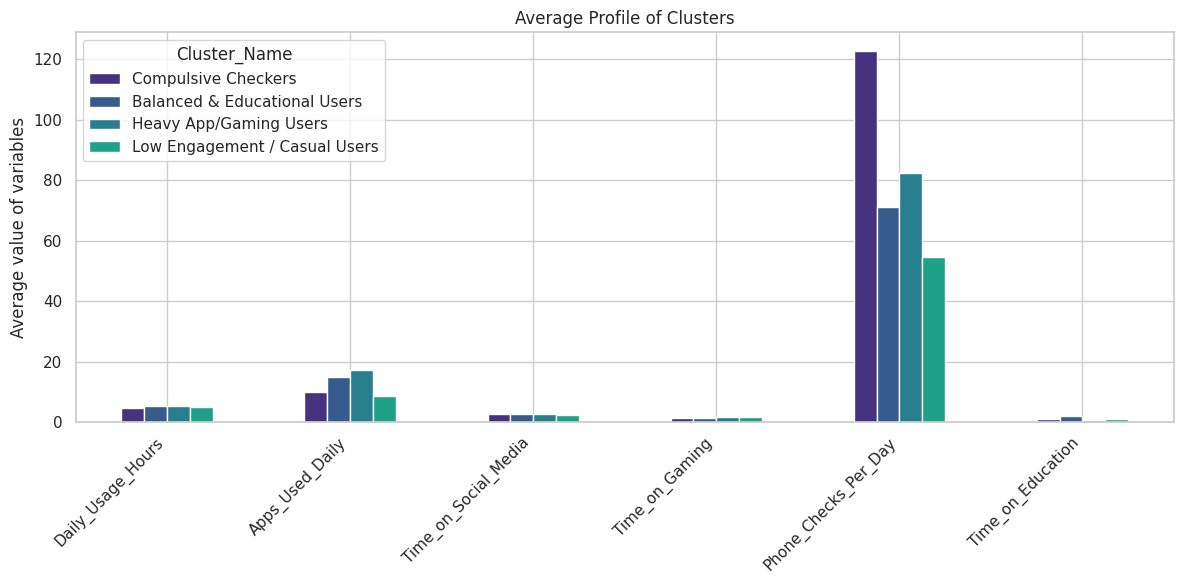

In [85]:
# Plot the average profile of each cluster
# Set the 'Cluster_Name' as the index for plotting
cluster_profile.set_index('Cluster_Name').T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Profile of Clusters') # Set the title of the plot
plt.ylabel('Average value of variables') # Set the y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

## Distribuição de variáveis categóricas por cluster
Nesta etapa, adicionamos os rótulos de cluster ao DataFrame original e analisamos como variáveis categóricas como gênero, nível escolar e finalidade do uso do celular estão distribuídas entre os diferentes grupos identificados pelo algoritmo de clustering.

Utilizamos gráficos de contagem (countplots) para mostrar o número de ocorrências de cada categoria em cada cluster. Esses gráficos ajudam a identificar padrões demográficos ou de comportamento que caracterizam cada grupo.

---

## Distribution of categorical variables by cluster
At this stage, we add the cluster labels to the original DataFrame and analyze how categorical variables such as gender, school grade, and phone usage purpose are distributed among the different groups identified by the clustering algorithm.

We use count plots to display how many individuals in each category fall into each cluster. These visualizations help reveal demographic or behavioral patterns that characterize each group.

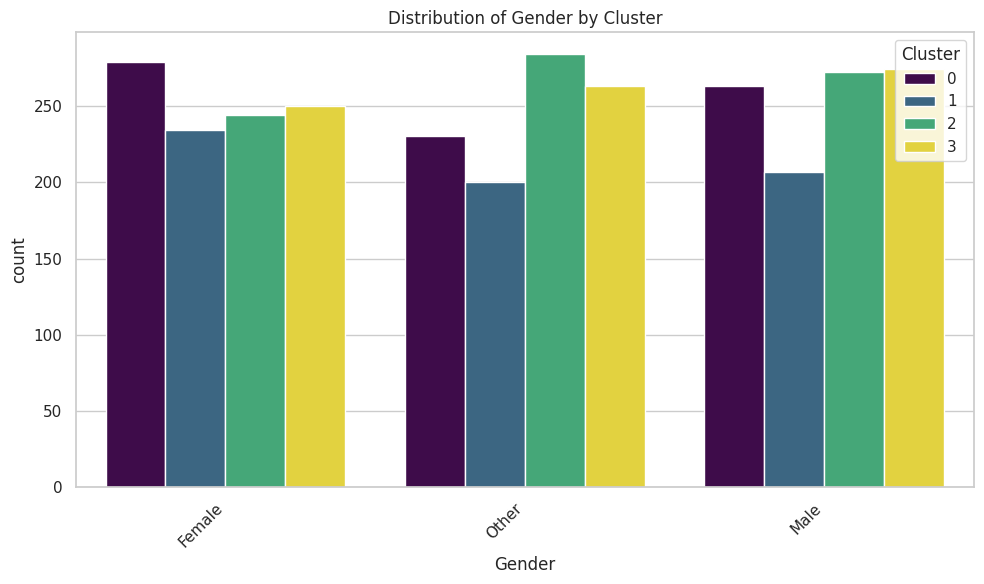

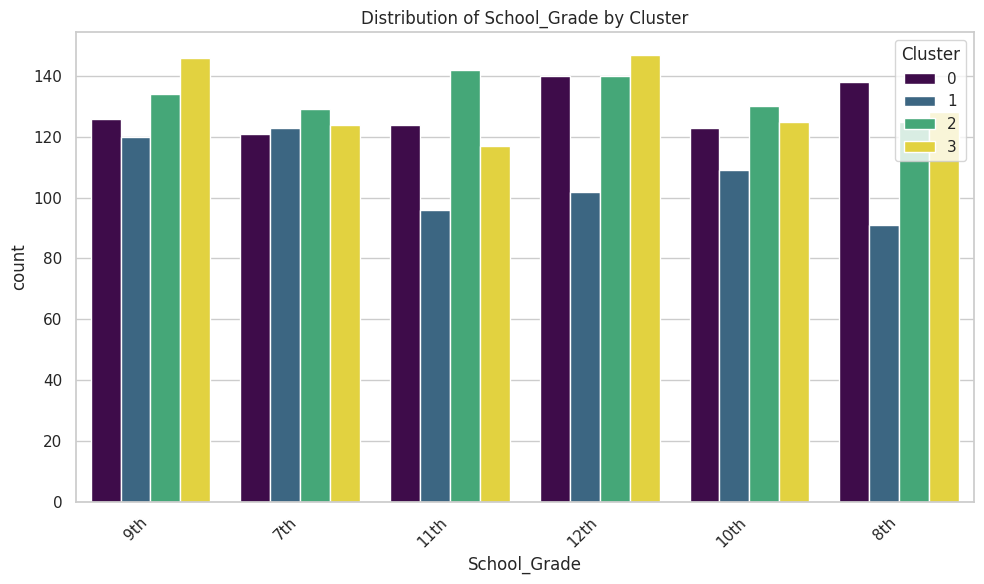

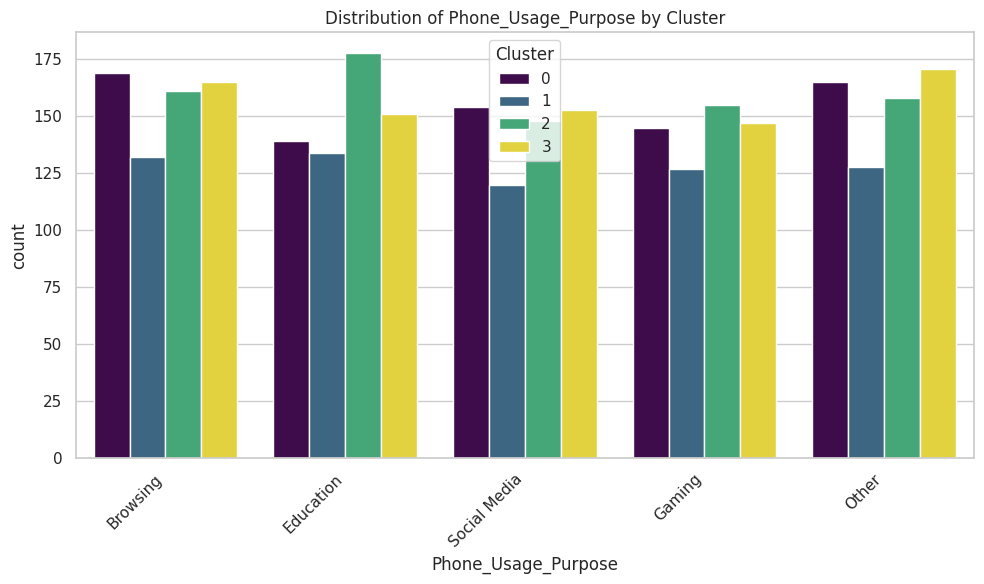

In [86]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Identify categorical columns to analyze
categorical_cols_to_plot = ['Gender', 'School_Grade', 'Phone_Usage_Purpose'] # Select relevant categorical columns

# Iterate through selected categorical columns and create count plots by cluster
for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6)) # Set figure size for each plot
    # Create a count plot for the current categorical column, separated by cluster
    sns.countplot(data=df, x=col, hue='Cluster', palette='viridis')
    plt.title(f'Distribution of {col} by Cluster') # Set the title
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout
    plt.show() # Display the plot

# 📊 Conclusão e Sumário

## 🔍 Sumário da Análise de Clusters e Implicações

A clusterização K-Means aplicada às variáveis de uso padronizadas identificou quatro perfis distintos entre adolescentes:

### Cluster 0: Verificadores Compulsivos  
- **Características:** Este grupo apresenta a maior média de `Phone_Checks_Per_Day` (cerca de 123), muito acima dos demais clusters. As `Daily_Usage_Hours` são moderadas, e o tempo gasto em `Time_on_Social_Media` também é mediano. Os tempos em `Time_on_Gaming` e `Time_on_Education` são baixos, com uso moderado de `Apps_Used_Daily`.  
- **Implicações:** A principal característica deste grupo é o comportamento compulsivo de checar o celular com frequência, o que pode estar ligado à ansiedade e dependência de notificações. Apesar de não usarem o celular por tanto tempo contínuo, essa compulsividade pode indicar risco elevado de vício digital. Estratégias como controle de notificações e práticas de atenção plena podem ser úteis aqui.

### Cluster 1: Usuários Balanceados & Educacionais  
- **Características:** Este grupo apresenta um perfil equilibrado, com uso diário moderado e o maior tempo médio em `Time_on_Education`. Também possuem baixos valores de `Phone_Checks_Per_Day`, `Time_on_Gaming` e `Time_on_Social_Media`.  
- **Implicações:** Estes adolescentes parecem usar o celular de forma mais produtiva, especialmente para fins educacionais. O comportamento indica uma relação saudável com a tecnologia. Eles podem se beneficiar ainda mais de programas educacionais que incentivem esse bom uso.

### Cluster 2: Usuários Intensos de Apps/Jogos  
- **Características:** Este grupo se destaca pelo maior número de `Apps_Used_Daily` e alto tempo em `Time_on_Gaming`. Também têm uso elevado de `Daily_Usage_Hours` e `Time_on_Social_Media`, mas tempo educacional muito baixo.  
- **Implicações:** O uso intenso de jogos e apps pode comprometer o desempenho escolar e reduzir interações físicas e sociais. Intervenções para promover hábitos equilibrados e atividades offline seriam recomendadas.

### Cluster 3: Usuários Casuais / Baixo Engajamento  
- **Características:** Este grupo mostra os menores valores em praticamente todas as métricas: pouco tempo de uso, poucos aplicativos, baixa checagem e pouco envolvimento com mídia social ou educação.  
- **Implicações:** Pode representar jovens com menos acesso, interesse ou necessidade de uso constante do celular. Embora o risco de vício seja baixo, é importante entender se o desengajamento é voluntário ou por limitações externas.

### Implicações Gerais  
Os clusters revelam a variedade de padrões de uso entre adolescentes, o que permite ações mais específicas:

- **Educadores:** Adaptar programas que valorizem o uso educacional da tecnologia (como no Cluster 1) e intervenções para usuários voltados ao entretenimento (Cluster 2).  
- **Pais:** Estabelecer limites e promover conversas baseadas no tipo de uso individual dos filhos.  
- **Profissionais de Saúde Mental:** Identificar comportamentos como checagem compulsiva (Cluster 0) para trabalhar questões como ansiedade e vício digital.

Com abordagens personalizadas, é possível promover um uso mais saudável da tecnologia entre os jovens e reduzir os impactos negativos do uso excessivo.

---

# 📊 Conclusion and Summary

## 🔍 Summary of Cluster Analysis and Implications

The K-Means clustering applied to standardized usage variables identified four distinct profiles among teenagers:

### Cluster 0: Compulsive Checkers  
- **Characteristics:** This group has the highest average `Phone_Checks_Per_Day` (around 123), far above other clusters. Their `Daily_Usage_Hours` are moderate, with average `Time_on_Social_Media` and lower `Time_on_Gaming` and `Time_on_Education`. They also use a moderate number of `Apps_Used_Daily`.  
- **Implications:** This behavior indicates high reactivity to notifications and possibly anxiety or FOMO. Although their total screen time isn't extreme, their compulsive checking pattern signals risk for digital addiction. They could benefit from strategies like reducing notification exposure and practicing mindful usage.

### Cluster 1: Balanced & Educational Users  
- **Characteristics:** This group shows moderate usage overall and the highest `Time_on_Education`. Their `Phone_Checks_Per_Day`, `Time_on_Gaming`, and `Time_on_Social_Media` are relatively low.  
- **Implications:** These teens appear to use smartphones for positive, educational purposes. Their healthy usage pattern could be supported through educational programs that build on their good habits.

### Cluster 2: Heavy App/Gaming Users  
- **Characteristics:** This cluster features the highest `Apps_Used_Daily` and high `Time_on_Gaming`. They also show elevated `Daily_Usage_Hours` and `Time_on_Social_Media`, with low `Time_on_Education`.  
- **Implications:** High app and gaming engagement can interfere with academics and social life. Interventions might focus on promoting offline activities and balanced use habits.

### Cluster 3: Low Engagement / Casual Users  
- **Characteristics:** This group has the lowest usage across all variables: fewer apps, shorter screen time, and little educational or entertainment engagement.  
- **Implications:** They may prefer offline activities, have limited access, or intentionally avoid screen time. Though their risk of digital harm is low, it's important to assess the reason behind the low engagement.

### Overall Implications  
These distinct usage profiles highlight the need for tailored approaches:

- **Educators:** Encourage productive tech use (Cluster 1) and help heavy users manage their habits (Cluster 2).  
- **Parents:** Set boundaries and give feedback aligned with each child’s usage pattern.  
- **Mental Health Professionals:** Address digital behaviors like compulsive checking (Cluster 0) that may signal emotional distress.

By avoiding a one-size-fits-all strategy, we can foster healthier relationships with technology in adolescence. Future research could explore links between clusters and academic or health outcomes.




---



# 📊 Resumo da Análise de Dados
## 🔍 Principais Descobertas
O projeto identificou com sucesso quatro clusters distintos de adolescentes com base nos padrões de uso de smartphones:
"Notificadores Compulsivos", "Usuários Equilibrados e Educacionais", "Usuários Intensos de Apps/Jogos" e "Usuários Casuais com Baixo Engajamento".

Notificadores Compulsivos verificam o celular com altíssima frequência, o que pode sugerir ansiedade ou dependência digital.

Usuários Equilibrados e Educacionais apresentam uso moderado geral, mas com ênfase em aplicativos educacionais — indicando um uso mais saudável.

Usuários Intensos de Apps/Jogos gastam bastante tempo com jogos e apps variados, com pouco uso educacional — isso pode prejudicar o desempenho acadêmico e aumentar o sedentarismo.

Usuários Casuais com Baixo Engajamento têm pouca interação com o celular, com risco mínimo de uso problemático.

O algoritmo K-Means, aliado ao Método do Cotovelo e ao Índice de Silhueta, foi eficaz na identificação dos grupos.

A visualização via PCA confirmou a separação dos clusters com base nas variáveis selecionadas.

## 💡 Próximos Passos e Possíveis Aplicações
Os perfis distintos sugerem que intervenções específicas para cada grupo são mais eficazes do que uma abordagem única.

Futuras análises podem cruzar esses clusters com variáveis de desempenho escolar, saúde mental e física, que constam no dataset original, para validar e quantificar os riscos de cada perfil.

---

#📊 Data Analysis Summary
##🔍 Key Findings
The project successfully identified four distinct clusters of teenage smartphone users based on usage patterns:
"Compulsive Checkers", "Balanced & Educational Users", "Heavy App/Gaming Users", and "Low Engagement / Casual Users".

Compulsive Checkers frequently check their phones, possibly indicating anxiety or smartphone dependence.

Balanced & Educational Users show moderate usage with a strong focus on educational apps, suggesting healthier phone habits.

Heavy App/Gaming Users spend a lot of time on games and other apps, with little focus on education — this might harm academic performance and promote a sedentary lifestyle.

Low Engagement / Casual Users have minimal interaction with phones, indicating low risk of digital addiction.

The K-Means algorithm, combined with the Elbow Method and Silhouette Score, effectively distinguished the groups.

PCA visualization confirmed the separation of clusters based on selected usage features.

💡 Insights and Next Steps
The distinct profiles call for tailored interventions rather than one-size-fits-all solutions.

Future analysis could explore correlations between these clusters and variables related to academic performance, mental health, and physical well-being (present in the original dataset but not used in clustering) to better understand the potential risks.